In [98]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import math
from IPython.display import Image
import time

plotly.tools.set_credentials_file(username='xjiang36', api_key='uZyWsdSH3xd9bxUefIFf')
# ASSUMPTIONS:
# 1.Data-set structure follows: NAME, DATE, LATITUED, LONGITUDE, CATEGORY, QUAN1, QUAN2, QUAN3,...QUANN.
# 2.SIZE
# 3.CATEGORY: TOP10 AND OTHERS

In [106]:
def Whaleteam(dataset='Q3-moreCtgSample.csv',topn=10,quantnum=1,savetype="inchunk",startyear=-99999,startmth=1,endyear=99999,endmth=12):
    for main in range(1):
        if savetype=="inchunk":
            break
        if savetype=="online":
            break
        if savetype=="png":
            break
        if savetype=="jpeg":
            break
        else:
            return "Error: invalid input of \"savetype\""
        
    
    colnum=quantnum+4
    dftemp = pd.read_csv(dataset,encoding='iso-8859-1')
    colnames=dftemp.columns.values
    
    for main in range(1):
        if startyear>endyear:
            return "Error: wrong input of \"startyear\" or \"endyear\",\"startyear\" cannot be earlier than \"endyear\"."
        if startmth>12:
            return "Error: wrong input of \"startmth\"."
        if startmth<1:
            return "Error: wrong input of \"startmth\"."
        if endmth>12:
            return "Error: wrong input of \"endmth\"."
        if endmth<1:
            return "Error: wrong input of \"endmth\"."
        if type(startyear)!=int:
            return "Error: wrong input of \"startyear\"."
        if type(endyear)!=int:
            return "Error: wrong input of \"endyear\"."
        if type(startmth)!=int:
            return "Error: wrong input of \"startmth\"."
        if type(endmth)!=int:
            return "Error: wrong input of \"endmth\"."
        if startyear==endyear:
            if startmth>endmth:
                return "Error: wrong input of \"startmth\" or \"endmth\"."
    
    if startyear<time.gmtime(min(dftemp[colnames[1]]))[0]:
        startyear=time.gmtime(min(dftemp[colnames[1]]))[0]
    if endyear>time.gmtime(max(dftemp[colnames[1]]))[0]:
        endyear=time.gmtime(max(dftemp[colnames[1]]))[0]
    
    sub=[]
    for i in range(len(dftemp[colnames[1]])):
        if time.gmtime(dftemp[colnames[1]][i])[0]>=startyear:
            if time.gmtime(dftemp[colnames[1]][i])[1]>=startmth:
                sub.append(i)
    dftemp1=dftemp.loc[sub]
    #print (len(dftemp1))
    sub2=[]
    for i in range(len(dftemp1.index)):
        if time.gmtime(dftemp[colnames[1]][i])[0]<=endyear:
            if time.gmtime(dftemp[colnames[1]][i])[1]<=endmth:
                sub2.append(i)    
    df1=dftemp1.loc[sub2]
    df2=df1.dropna(how='all')
    df3=df2.reset_index()
    df3colnames=df3.columns
    df=df3[df3colnames[1:]]
    #print (df)
    #print (len(df))
    
    for i in range(1):
        if quantnum<1:
            return "Error: wrong input of \"quantnum\", which should be an possitive integer."
        elif (quantnum+5)>len(colnames):
            return "Error: wrong input of  \"quantnum\". No that many quantitive variable."
        elif type(quantnum)!=int:
            return "Error: wrong input of \"quantnum\", which should be an possitive integer."
    
    freq=df[colnames[4]].value_counts().reset_index().rename(columns={'index': 'x'})
    
    freqcol=freq.columns.values
    
    for i in range(1):
        if len(freq)<topn:
            print ("freq=%s"%freq)
            print ("topn=%s"%topn)
            return "Error: wrong input of \"topn\",  No that many categories."
        elif topn<1:
            return "Error: wrong input of \"topn\", which should be an possitive integer."      
        elif type(topn)!=int:
            return "Error: wrong input of \"topn\", which should be an possitive integer."
        
    # Top 10 category in colorful, others in grey
    colorbar=["#FF0000","#FF8000","#FFFF00","#00FF00","#00FFFF","#0080FF","#0000FF","#7F00FF","#FF00FF","#FF007F","#C0C0C0"]
    colorbars=[]
    for i in range(len(df[colnames[4]])):
    #for i in range(len(df.index)):
        for j in range(len(freq)):
            if df[colnames[4]][i]==freq["x"][j]:
                if j<(topn):
                    colorbars.append(colorbar[j])
                else:
                    colorbars.append(colorbar[10])

    sizes=[]
    for i in range(len(df[colnames[colnum]])):
        if df[colnames[colnum]][i]>df[colnames[colnum]].median():
            if df[colnames[colnum]][i]>(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median()):
                sizes.append(15)
            else:
                sizes.append(9)
        else:
            if df[colnames[colnum]][i]>(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median()):
                sizes.append(6)
            else:
                sizes.append(3)

    colorbars1=[]
    for i in range(topn):
        colorbars1.append(colorbar[i])
    colorbars1.append(colorbar[10])
#topn=5         
    topfreq=freq[:(topn+1)]
    topfreq.set_value(topn,freqcol[0],"Other")
    topfreq.set_value(topn,freqcol[1],sum(freq[freqcol[1]][topn:]))

    locations = Bar(x=topfreq[freqcol[0]],y=freq[freqcol[1]], marker=dict(color=colorbars1))

    trace3 = {
      "geo": "geo3", 
      "lon": df[colnames[3]],
      "lat": df[colnames[2]],
      "hoverinfo": 'text',
      "marker": {
        "size": sizes,
        "opacity": 0.8,
        "color": colorbars,
        "colorscale": 'Viridis'
      }, 
      "mode": "markers", 
      "type": "scattergeo"
    }

    data = Data([locations, trace3])

    # control the subplot below using domain in 'geo', 'scene', and 'axis'
    layout = {
      "plot_bgcolor": 'black',
      "paper_bgcolor": 'black',
      "titlefont": {
          "size": 20,
          "family": "Raleway"
      },
      "font": {
          "color": 'white'
      },
      "dragmode": "zoom", 
      "geo3": {
        "domain": {
          "x": [0, 0.55], 
          "y": [0.18, 0.9]
        }, 
        "lakecolor": "rgba(127,205,255,1)",
        "oceancolor": "rgb(6,66,115)",
        "landcolor": 'white',
        "projection": {"type": "orthographic"}, 
        "scope": "world", 
        "showlakes": True,
        "showocean": True,
        "showland": True,
        "bgcolor": 'black'
      }, 
      "margin": {
        "r": 10, 
        "t": 25, 
        "b": 40, 
        "l": 60
      }, 
      "scene": {"domain": {
          "x": [0.5, 1], 
          "y": [0, 0.55]
        },
               "xaxis": {"gridcolor": 'white'},
               "yaxis": {"gridcolor": 'white'},
               "zaxis": {"gridcolor": 'white'}
               }, 
      "showlegend": False, 
      "title": "<br>Overview of \"%s\" (top%s) from %s/%s to %s/%s" % (colnames[colnum],topn,startyear,startmth,endyear,endmth), 
      "xaxis": {
        "anchor": "y", 
        "domain": [0.6, 0.95]
      }, 
      "yaxis": {
        "anchor": "x", 
        "domain": [0.1, 0.9],
        "showgrid": False
      }
    }

    annotations = { "text": "Histrogram of \"%s\" (top%s)" % (colnames[colnum],topn),
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0.85,
                   "y": 0.95}

    annotations2 = { "text": "0%% to 25%%:%s to %s".ljust(30)%(round(df[colnames[colnum]].min(),4),round(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median(),4))+"<br>"+"25%% to 50%%:%s to %s".ljust(30)%(round(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median(),4),round(df[colnames[colnum]].median(),4))+"<br>"+"50%% to 75%%:%s to %s".ljust(30)%(round(df[colnames[colnum]].median(),4),round(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median(),4))+"<br>"+"75%% to 100%%:%s to %s".ljust(30)%(round(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median(),4),round(df[colnames[colnum]].max(),4)),
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0,
                   "y": 0}

    layout['annotations'] = [annotations,annotations2]

    fig = Figure(data=data, layout=layout)
    
    for i in range(1):
        if savetype=="inchunk":
            py.image.ishow(fig)
        elif savetype=="online":
            py.iplot(fig, filename = "Whale-plot")
        elif savetype=="png":
            py.image.save_as(fig,'Whale-plot.png')
        elif savetype=="jpeg":
            py.image.save_as(fig,'Whale-plot.jpeg')
        else:
            return "print default save type: in chunk"
    #py.image.save_as(fig,"Histrogram of \"%s\" (top%s).png" % (colnames[colnum],topn))
    #Image("Histrogram of \"%s\" (top%s).png" % (colnames[colnum],topn))
    
    #Image('Whale-plot.png')
    #Image('Whale-plot.jpeg')

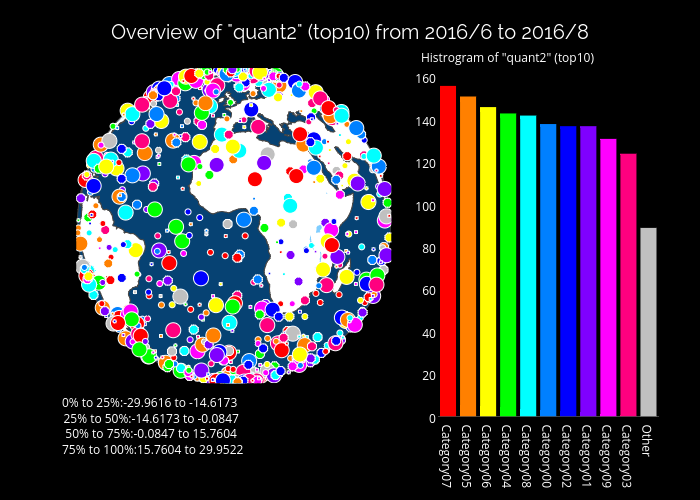

In [109]:
Whaleteam(dataset='Q3-moreCtgSample.csv',topn=10,quantnum=2,savetype="inchunk",startyear=2016,startmth=6,endyear=2016,endmth=8)

In [110]:
Whaleteam(dataset='Q3-moreCtgSample.csv',topn=10,quantnum=2,savetype="online",startyear=2016,startmth=6,endyear=2016,endmth=8)

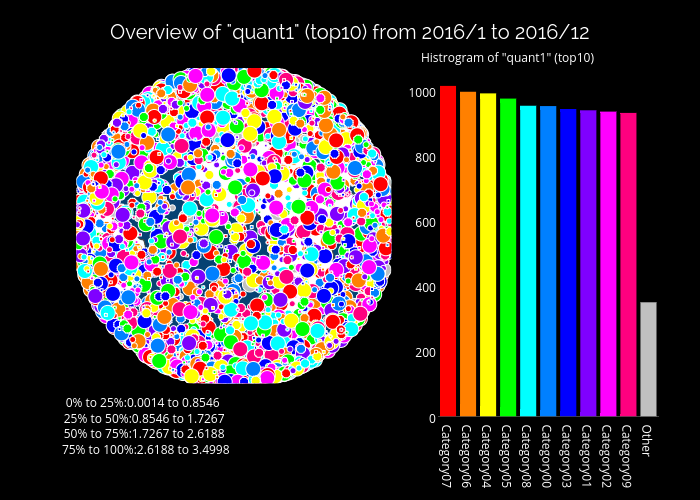

In [102]:
Whaleteam()